<center><font size = "10"> Week 13 - Simplification <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:

# Ex1. Integrate-And-Fire (IF) Neuron Model

<font size='3'>Explain what is an Integrate-And-Fire (IF) neuron model.
    
<font size='3'>Explain why do you think this type of model is useful for.

<font size='3'>Find in the literature a couple of examples that use this type of model and explain how did the authors used the IF neuron model for their research. [2 pts]

An IF model is one in which a membrane potential is calculated by integrating input currents over time (usually by modelling the membrane as an RC circuit with inputs as current injection). When the membrane potential reaches some threshold, a spike is fired and the membrane potential is instanteously set to some value corresponding to the post-spike hyperpolariation potential, from which the simulation is continued.

IF neurons significantly reduce the computational cost of simulations relative to biophysical models. IF models are particularly useful for simulating large networks where fully-detailed models would be impractical, in studies where the morphology and membrane biophysics of the neuron are not of interest, and where anlaytical analysis of the behavior of the neuron or network is desired.

Brette and Gerstner use an IF model to reproduce the spike-timing behavior of several different e-types (https://doi.org/10.1152/jn.00686.2005). Diesmann et al. use IF models to study propogation of spiking activity in a network (https://doi.org/10.1038/990101). Zerlaut et al. use IF models (in combination with mean-field models) to study voltage-sensitive sye signals in a neural network model (https://doi.org/10.1007/s10827-017-0668-2)

# Ex2. Point Neuron: non periodic firing behavior

<font size='3'>Create one artificial simplified IF point neuron that responds to excitatory and inhibitory stimulations, similar to the one in tutorial 01 (IntFire4). Play with the parameters of the neuron (taum, taui1, taui2 and taue) by increasing and decreasing them, show the results by plotting (Vm, I, E,+input, -input and output) and explain what is the role of each parameter using the plots. [2 pts]


Tau_m is the membrane time constant, and effectively defines the window over which the neuron integrates inputs. When tau_m is reduced to 1, the neuron does not fire, since the membrane potential returns to near-baseline after every afferent excitatory spike. When tau_m is increased to 20, the potential decays very little after each excitatory spike. While the effect of increasing tau_m applies to inhibitory inputs as well as excitatory, this is not as clearly visible in the voltage traces.

Taui1 is the rise time constant for the inhibitory synapse. Increasing tau_i1 to 9 thus slightly decreases the output firing rate, while decreasing tau_i1 to 1 significantly increases the firing rate.

Taui2 is the decay time constant for the inhibitory synapse. When tau_i2 is decreased to 6, the firing rate increases, while when it is increased to 20, the firing rate decreases significantly, with no spikes occuring in the later part of the simulation.

Tau_e is the decay time constant for the excitatory synapse. When it is decreased to 1, no spikes occur, and the membrane potential decays back to baseline after every excitatory input. When tau_e is increased to significantly, as the membrane potential rises more quickly after each excitatory input.

In [9]:
from neuron import h
import matplotlib.pyplot as plt
import math as m

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

In [113]:
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant

In [114]:
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

In [115]:
# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)

In [116]:
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)

Vector[129]

In [117]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function

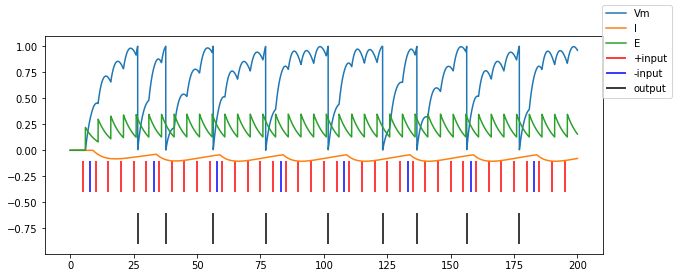

In [22]:
# Default parameters
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

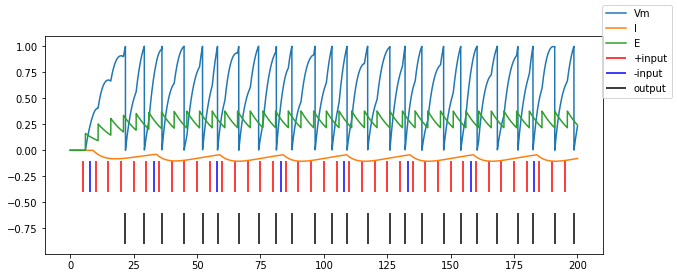

In [77]:
# Tau_e = 9
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

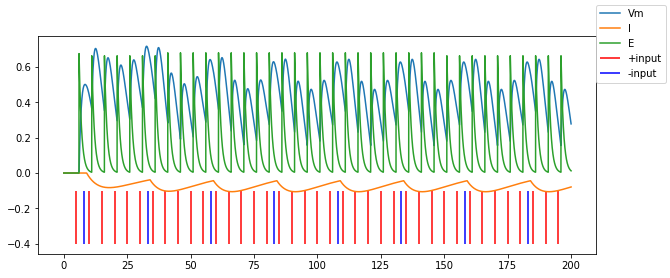

In [83]:
# Tau_e = 1
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

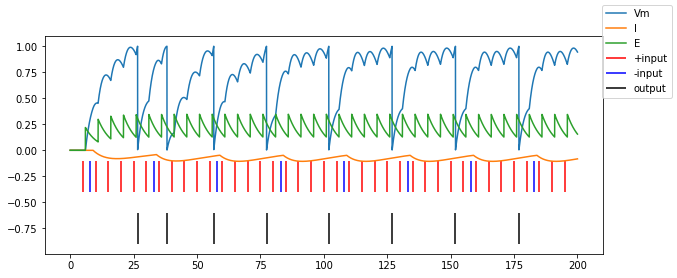

In [89]:
# Tau_i1 = 9
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

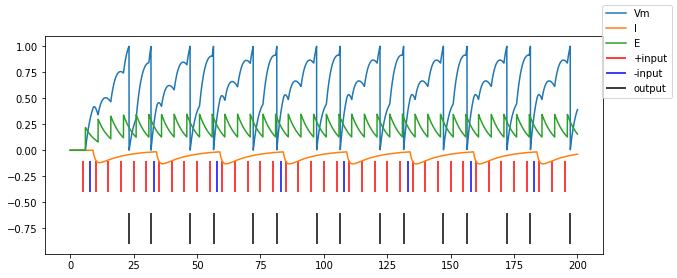

In [95]:
# Tau_i1 = 1
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

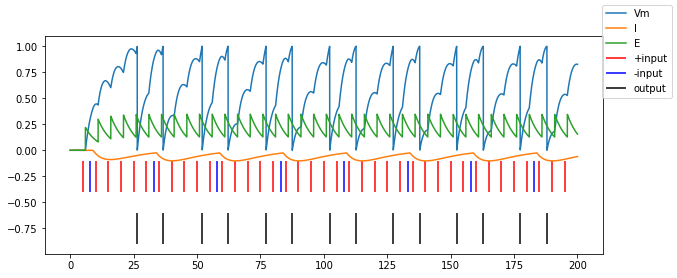

In [106]:
# Tau_i2 = 6
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

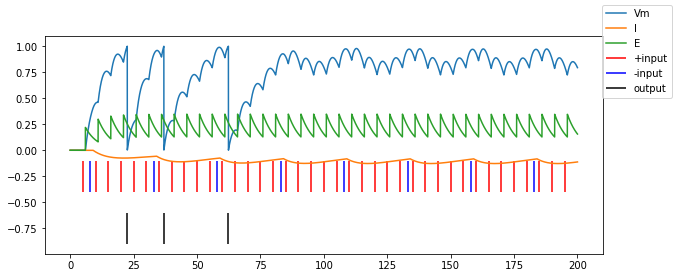

In [112]:
# Tau_i2 = 20
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

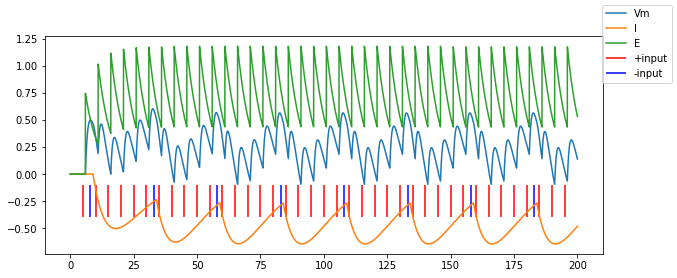

In [64]:
# Tau_m = 1
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

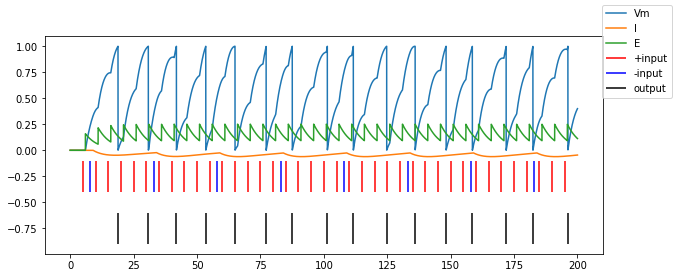

In [70]:
# Tau_m = 20
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
fig.legend()

# Ex3. Point Neuron Network

<font size='3'>Create a point neuron network with 20 IF neurons, 56% would be the probability that a cell could be excitatory. Define a cell population in which the excitatory and the inhibitory cells have different model parameters (taum, taui1, taui2 and taue) of your choice (try to get values that would make the neurons fire nicely). Define random connectivity, stimulation and simulation as it is in tutorial 02. Plot the voltage traces and the raster as your solution. [2 pts]